<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/Machine_Learning_Algorithm/Practical/KNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN_assignment

# Step 1: Data Loading and Preprocessing

## Import Libraries


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np


## Load the Data

In [29]:
# Load your CSV file
file_path = '/content/loan_default.csv'
df = pd.read_csv(file_path)
print(df.head())  # Check the first few rows
print(df.info())  # Get a summary of the data

  Income  LoanAmount  CreditScore  Defaulted
0  11472     30483.0        420.0        0.0
1   5727         NaN        751.0        1.0
2  15732     23763.0        428.0        1.0
3   6958         NaN        390.0        1.0
4   2524     16733.0        328.0        1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       196 non-null    object 
 1   LoanAmount   194 non-null    float64
 2   CreditScore  194 non-null    float64
 3   Defaulted    194 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.5+ KB
None


## Data Cleaning

- SimpleImputer: This is a tool from the scikit-learn library designed specifically for handling missing values.

- Any remaining missing values(NaN) are filled using the median of their respective columns. The median is a good choice as it is robust to outliers.

In [30]:
# Replace 'error' with NaN
df.replace('error', np.nan, inplace=True)

# Handle missing values using Median Imputation
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# .fit() : learns what value to use for each column's missing cells.
# .transform(): In DataFrame, it replaces all the missing values (like NaN or empty cells) with the medians
# .fit_transform : returns the data as a NumPy array
# pd.DataFrame(...) to convert it back into a pandas DataFrame.

print("\nDataFrame info after imputation:")
df_imputed.info()
print("\nDataFrame head after imputation:")
print(df_imputed.head())



DataFrame info after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       205 non-null    float64
 1   LoanAmount   205 non-null    float64
 2   CreditScore  205 non-null    float64
 3   Defaulted    205 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB

DataFrame head after imputation:
    Income  LoanAmount  CreditScore  Defaulted
0  11472.0     30483.0        420.0        0.0
1   5727.0     22971.5        751.0        1.0
2  15732.0     23763.0        428.0        1.0
3   6958.0     22971.5        390.0        1.0
4   2524.0     16733.0        328.0        1.0


# Step 2: Data Splitting
- The dataset is split into features (X) and the target variable (y). In this case, Defaulted is the target you want to predict.

- The data is then divided into a training set (80%) and a testing set (20%). The model will learn from the training set and be evaluated on the unseen testing set.

- Feature scaling is applied using StandardScaler to standardize the feature values. This is important for both Logistic Regression and especially for KNN, which is a distance-based algorithm

In [31]:
X = df_imputed[['Income', 'LoanAmount', 'CreditScore']]
y = df_imputed['Defaulted']


## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

# Add stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (164, 3)
X_test shape: (41, 3)
y_train shape: (164,)
y_test shape: (41,)


## Scale the features

In [47]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training and Prediction
## Logistic Regression

In [51]:

log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)



## K-Nearest Neighbors (KNN)

In [52]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)




# Step 4: Model Evaluation and Comparison

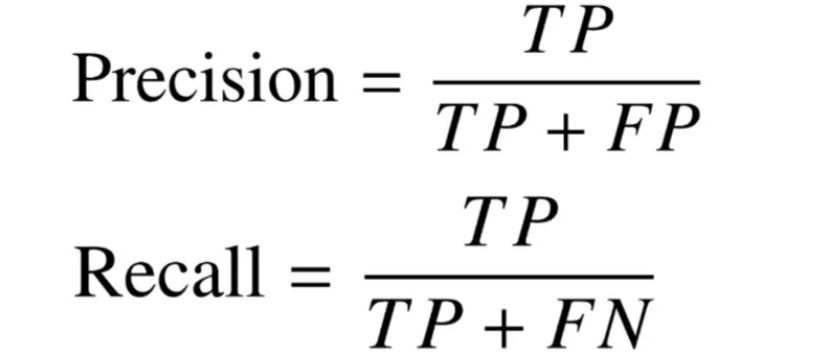

In [54]:
# --- Logistic Regression Evaluation ---
print("\n--- Logistic Regression Metrics ---")
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')  # Our target variable Defaulted is not strictly binary (0 or 1), so we have to use Weighted
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')

print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, zero_division=0))


# --- KNN Evaluation ---
print("\n--- KNN Metrics ---")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))


--- Logistic Regression Metrics ---
Accuracy: 0.4878
Precision: 0.5017
Recall: 0.4878

Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.67      0.53        18
         1.0       0.57      0.36      0.44        22
        10.0       0.00      0.00      0.00         1

    accuracy                           0.49        41
   macro avg       0.34      0.34      0.33        41
weighted avg       0.50      0.49      0.47        41


--- KNN Metrics ---
Accuracy: 0.5854
Precision: 0.5706
Recall: 0.5854

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.39      0.47        18
         1.0       0.59      0.77      0.67        22
        10.0       0.00      0.00      0.00         1

    accuracy                           0.59        41
   macro avg       0.39      0.39      0.38        41
weighted avg       0.57      0.59      0.56        41



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
